In [1]:
from datasets import Preprocessor_2p5D
from plotting.plotting import make_seg_img
from load_config import load_config
from evaluator import Evaluator
from utils import model_from_config

In [2]:
config = load_config()
pre = Preprocessor_2p5D(config)

In [3]:
a = pre.get_scan_no_slice(97)

In [4]:
vol, seg = a

In [5]:
vol.shape, seg.shape

(torch.Size([671, 512, 512]), torch.Size([671, 512, 512]))

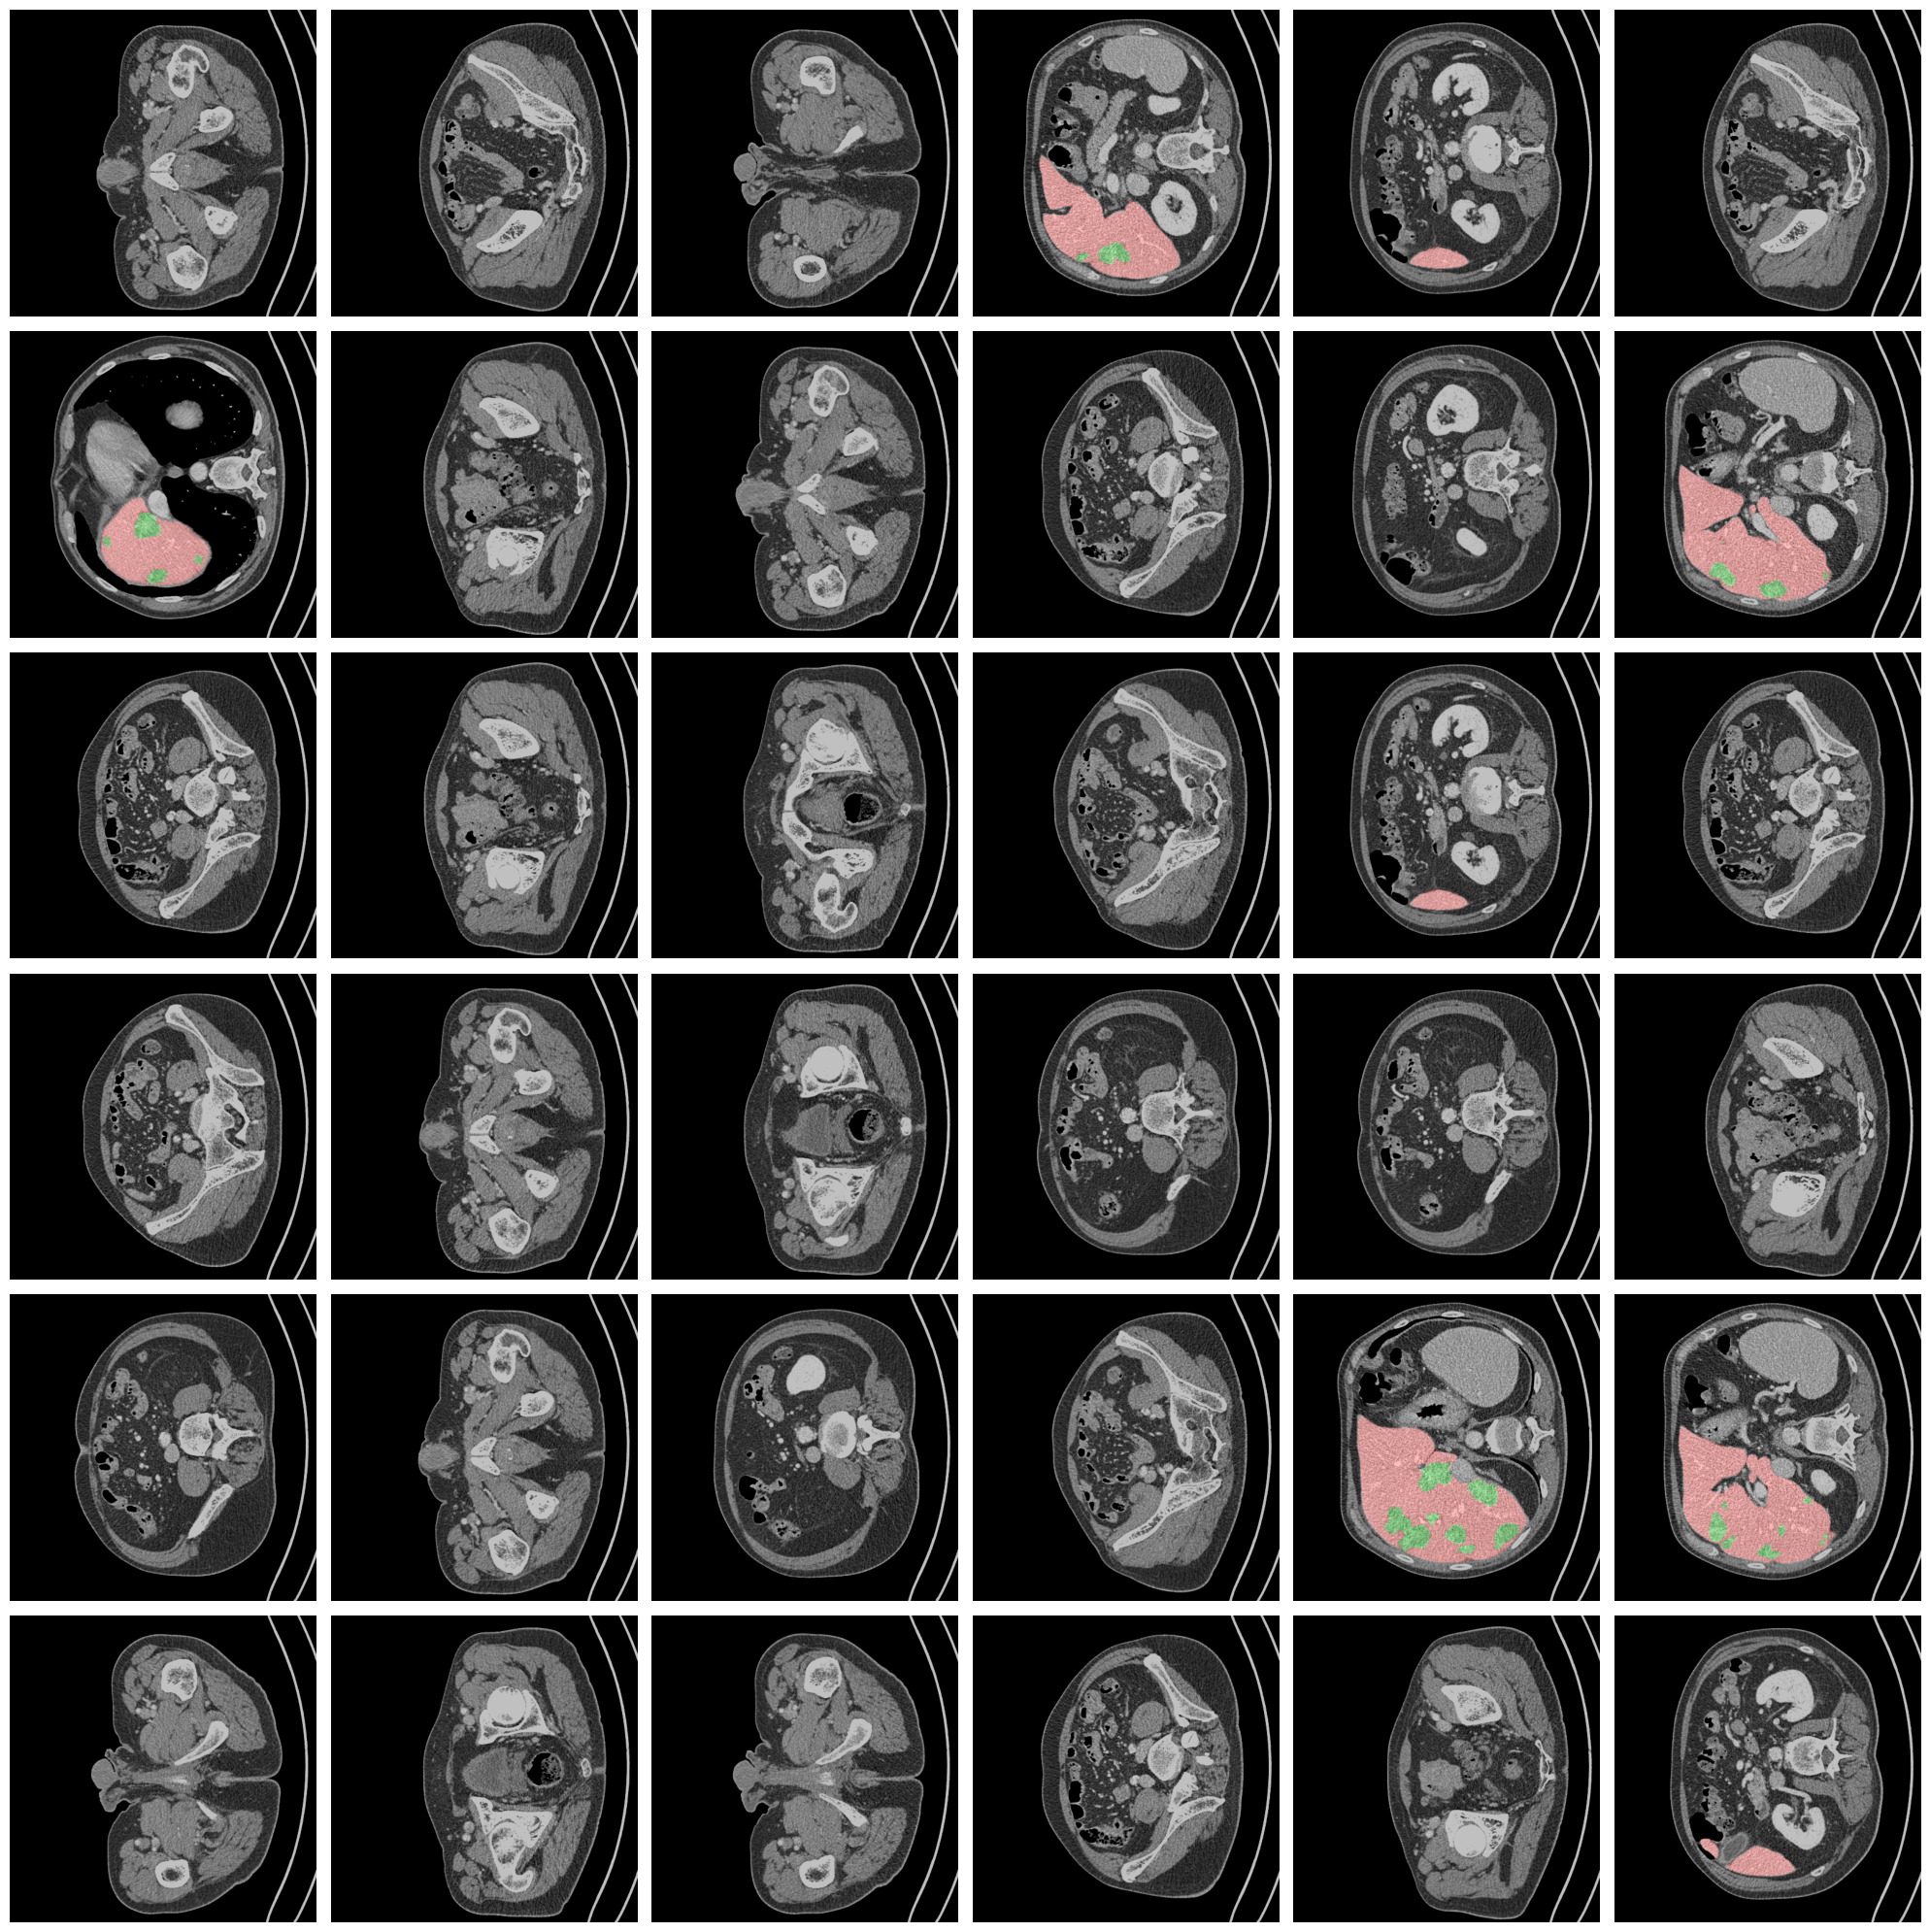

In [6]:
import matplotlib.pyplot as plt
import random
size = 6
fig, axes = plt.subplots(size, size, frameon=False, figsize=(20, 20))
for i in range(size * size):
    row = i // size
    col = i % size

    ax = axes[row][col]
    ax.set_axis_off()

    idx = random.randint(0, vol.shape[0] - 1)

    ax.imshow(vol[idx].unsqueeze(0).permute(1, 2, 0).numpy(), cmap='gray')
    seg_img = make_seg_img(seg[idx])
    ax.imshow(seg_img, cmap='jet', alpha=0.25)

fig.tight_layout()

In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np


In [8]:
with open('checkpoint_evaluations.json', 'r') as f:
    scores = json.load(f)

In [9]:
x = sorted(map(int, scores.keys()))
x

[300,
 3300,
 6300,
 9300,
 12300,
 15300,
 18300,
 21300,
 24300,
 27300,
 30300,
 33300,
 36300,
 39300,
 42300,
 45300,
 48300,
 51300,
 54300,
 57300,
 60300,
 63300,
 66300,
 69300,
 72300,
 75300,
 78300,
 81300,
 84300,
 87300]

In [10]:
y = {
    'empty': [],
    'liver': [],
    'cancer': []
}

In [11]:
for val in x:
    val_scores = scores[str(val)]
    empties = []
    livers = []
    cancers = []
    for v in val_scores.values():
        empties.append(v['empty'])
        livers.append(v['liver'])
        cancers.append(v['cancer'])

    y['empty'].append(np.array(empties).mean())
    y['liver'].append(np.array(livers).mean())
    y['cancer'].append(np.array(cancers).mean())



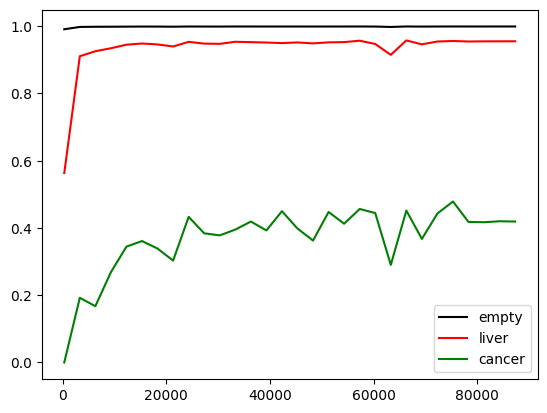

In [12]:
plt.plot(x, y['empty'], label='empty', c='black')
plt.plot(x, y['liver'], label='liver', c='red')
plt.plot(x, y['cancer'], label='cancer', c='green')
plt.legend()

In [13]:
list(zip(x, y['cancer']))

[(300, 0.0),
 (3300, 0.19231723742559553),
 (6300, 0.16736152336670784),
 (9300, 0.26855206191539766),
 (12300, 0.3444605842232704),
 (15300, 0.3611193083226681),
 (18300, 0.3386586382985115),
 (21300, 0.30296470448374746),
 (24300, 0.4329651653766632),
 (27300, 0.3839944422245026),
 (30300, 0.37793402969837187),
 (33300, 0.39516341984272),
 (36300, 0.41899008452892306),
 (39300, 0.39269731305539607),
 (42300, 0.4498308300971985),
 (45300, 0.3981886550784111),
 (48300, 0.36257044076919553),
 (51300, 0.44745540618896484),
 (54300, 0.41260246783494947),
 (57300, 0.45642134100198745),
 (60300, 0.4442905992269516),
 (63300, 0.2902040984481573),
 (66300, 0.45175838768482207),
 (69300, 0.3675221594050527),
 (72300, 0.44301890283823014),
 (75300, 0.4785662978887558),
 (78300, 0.41770505756139753),
 (81300, 0.41702925637364385),
 (84300, 0.41990835070610044),
 (87300, 0.41904074847698214)]

In [14]:
net = model_from_config(config)
evaluator = Evaluator(config, net, 'cuda')

In [15]:
scores = evaluator.evaluate_checkpoint(95400, apply_postprocess=True)

Total slices = 0
Total slices = 9
Total slices = 18
Total slices = 27
Total slices = 36
Total slices = 45
Total slices = 54
Total slices = 63
Total slices = 72
Total slices = 81
Total slices = 90
Total slices = 99
Total slices = 108
Total slices = 117
Total slices = 126
Total slices = 135
Total slices = 144
Total slices = 153
Total slices = 162
Total slices = 171
Total slices = 180
Total slices = 189
Total slices = 198
Total slices = 207
Total slices = 216
Total slices = 225
Total slices = 234
Total slices = 243
Total slices = 252
Total slices = 261
Total slices = 270
Total slices = 279
Total slices = 288
Total slices = 297
Total slices = 306
Total slices = 315
Total slices = 324
Total slices = 333
Total slices = 342
Total slices = 351
Total slices = 360
Total slices = 369
Total slices = 378
Total slices = 387
Total slices = 396
Total slices = 405
Total slices = 414
Total slices = 423
Total slices = 432
Total slices = 441
Total slices = 450
Total slices = 459
Total slices = 468
Total s

In [16]:
scores

{3: {'empty': 0.9992871284484863,
  'liver': 0.9697128534317017,
  'cancer': 0.0719178095459938},
 97: {'empty': 0.9990765452384949,
  'liver': 0.9469168186187744,
  'cancer': 0.8414667248725891},
 85: {'empty': 0.9984191060066223,
  'liver': 0.964634120464325,
  'cancer': 0.18247993290424347},
 32: {'empty': 0.9985008239746094, 'liver': 0.9752443432807922, 'cancer': 0.0},
 110: {'empty': 0.9995980858802795,
  'liver': 0.9618319869041443,
  'cancer': 0.6071847677230835},
 98: {'empty': 0.9989017248153687,
  'liver': 0.9272155165672302,
  'cancer': 0.8107075095176697},
 106: {'empty': 0.9994475841522217,
  'liver': 0.9550209641456604,
  'cancer': 0.0},
 122: {'empty': 0.9990724921226501,
  'liver': 0.9313793182373047,
  'cancer': 0.1895318180322647},
 6: {'empty': 0.9995918273925781,
  'liver': 0.9746198058128357,
  'cancer': 0.8003641963005066},
 66: {'empty': 0.9988471865653992,
  'liver': 0.9621042013168335,
  'cancer': 0.46556559205055237}}

In [17]:
# import json
# with open('best_model_scores.json', 'r') as f:
#     scores = json.load(f)

In [18]:
# with open('checkpoint_evaluations.json', 'r') as f:
#     unprocessed_scores = json.load(f)['75300']
with open('best_model_scores.json', 'r') as f:
    unprocessed_scores = json.load(f)

In [19]:
unprocessed_scores

{'3': {'empty': 0.999346911907196,
  'liver': 0.9723787903785706,
  'cancer': 0.5883059501647949},
 '97': {'empty': 0.9991453289985657,
  'liver': 0.9462573528289795,
  'cancer': 0.824832558631897},
 '85': {'empty': 0.9987409710884094,
  'liver': 0.9713559150695801,
  'cancer': 0.33356672525405884},
 '32': {'empty': 0.998207151889801,
  'liver': 0.9705280661582947,
  'cancer': 0.0},
 '110': {'empty': 0.9996035099029541,
  'liver': 0.962153971195221,
  'cancer': 0.6513028740882874},
 '98': {'empty': 0.9990557432174683,
  'liver': 0.9331786632537842,
  'cancer': 0.8192506432533264},
 '106': {'empty': 0.9994919896125793,
  'liver': 0.9582893252372742,
  'cancer': 0.0},
 '122': {'empty': 0.9989087581634521,
  'liver': 0.9227779507637024,
  'cancer': 0.38790950179100037},
 '6': {'empty': 0.9995455145835876,
  'liver': 0.9710744023323059,
  'cancer': 0.7545170783996582},
 '66': {'empty': 0.9989059567451477,
  'liver': 0.964046061038971,
  'cancer': 0.5544383525848389}}

In [20]:
table = []
for scan_idx in scores.keys():
    for cat in ('liver', 'cancer'):
        unproc_score = unprocessed_scores[str(scan_idx)][cat]
        proc_score = scores[scan_idx][cat]
        
        table.append((int(scan_idx), cat, False, unproc_score))
        table.append((int(scan_idx), cat, True, proc_score))

In [21]:
# table = list(zip(*table))

In [22]:
import pandas as pd

df = pd.DataFrame(table, columns=('scan_idx', 'category', 'new', 'score'))
df

scan_idx category    new     score
0          3    liver  False  0.972379
1          3    liver   True  0.969713
2          3   cancer  False  0.588306
3          3   cancer   True  0.071918
4         97    liver  False  0.946257
5         97    liver   True  0.946917
6         97   cancer  False  0.824833
7         97   cancer   True  0.841467
8         85    liver  False  0.971356
9         85    liver   True  0.964634
10        85   cancer  False  0.333567
11        85   cancer   True  0.182480
12        32    liver  False  0.970528
13        32    liver   True  0.975244
14        32   cancer  False  0.000000
15        32   cancer   True  0.000000
16       110    liver  False  0.962154
17       110    liver   True  0.961832
18       110   cancer  False  0.651303
19       110   cancer   True  0.607185
20        98    liver  False  0.933179
21        98    liver   True  0.927216
22        98   cancer  False  0.819251
23        98   cancer   True  0.810708
24       106    liver  False  0.958289
25       106    liver   True  0.955021
26       106   cancer  False  0.000000
27       106   cancer   True  0.000000
28       122    liver  False  0.922778
29       122    liver   True  0.931379
30       122   cancer  False  0.387910
31       122   cancer   True  0.189532
32         6    liver  False  0.971074
33         6    liver   True  0.974620
34         6   cancer  False  0.754517
35         6   cancer   True  0.800364
36        66    liver  False  0.964046
37        66    liver   True  0.962104
38        66   cancer  False  0.554438
39        66   cancer   True  0.465566

<AxesSubplot: xlabel='score', ylabel='category'>

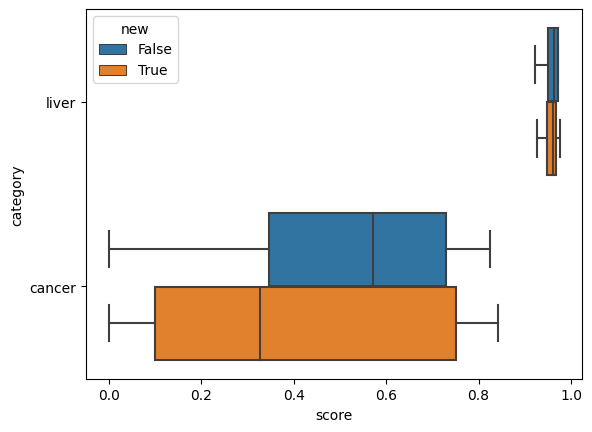

In [23]:
import seaborn as sns
sns.boxplot(data=df, x="score", y="category", hue="new")

In [24]:
df.query('category == "cancer" & new == True')['score'].mean()

0.3969218350946903

In [25]:
df.query('category == "cancer" & new == False')['score'].mean()

0.4914123684167862

In [26]:

df.query('category == "liver" & new == True')['score'].mean()

0.9568679928779602

In [27]:

df.query('category == "liver" & new == False')['score'].mean()

0.9572040498256683

In [ ]:

features = {}
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach().cpu()
    return hook



In [ ]:
from utils import load_newest

net = model_from_config(config).cuda()
net = load_newest(config['checkpoint_dir'],net=net, device='cuda')


In [ ]:
net.decoder.bb_blocks[-1].blocks[-1].cbam.SpatialGate.spatial.register_forward_hook(get_features('last_1_spatial'))
net.decoder.bb_blocks[-1].blocks[0].cbam.SpatialGate.spatial.register_forward_hook(get_features('last_0_spatial'))

net.encoder.bb_blocks[0].blocks[0].cbam.SpatialGate.spatial.register_forward_hook(get_features('first_0_spatial'))
net.encoder.bb_blocks[0].blocks[-1].cbam.SpatialGate.spatial.register_forward_hook(get_features('first_1_spatial'))

In [ ]:
from datasets import Data
data = Data(config)
val_set = data.get_val()

In [ ]:
val_set_iter = iter(val_set)

In [ ]:
vol, seg = next(val_set_iter)
(seg == 1).sum(), (seg == 2).sum()

(tensor(0), tensor(0))

In [ ]:
import torch
net.eval()
with torch.no_grad():
    out = net(vol.unsqueeze(0).to('cuda'))
    out = out.cpu()

In [ ]:
# features['first_spatial'].shape


KeyError: 'first_spatial'

In [ ]:
from plotting.plotting import plot_scan_slice

In [ ]:
vol.shape

torch.Size([5, 512, 512])

In [ ]:
spatial_attn.shape

NameError: name 'spatial_attn' is not defined

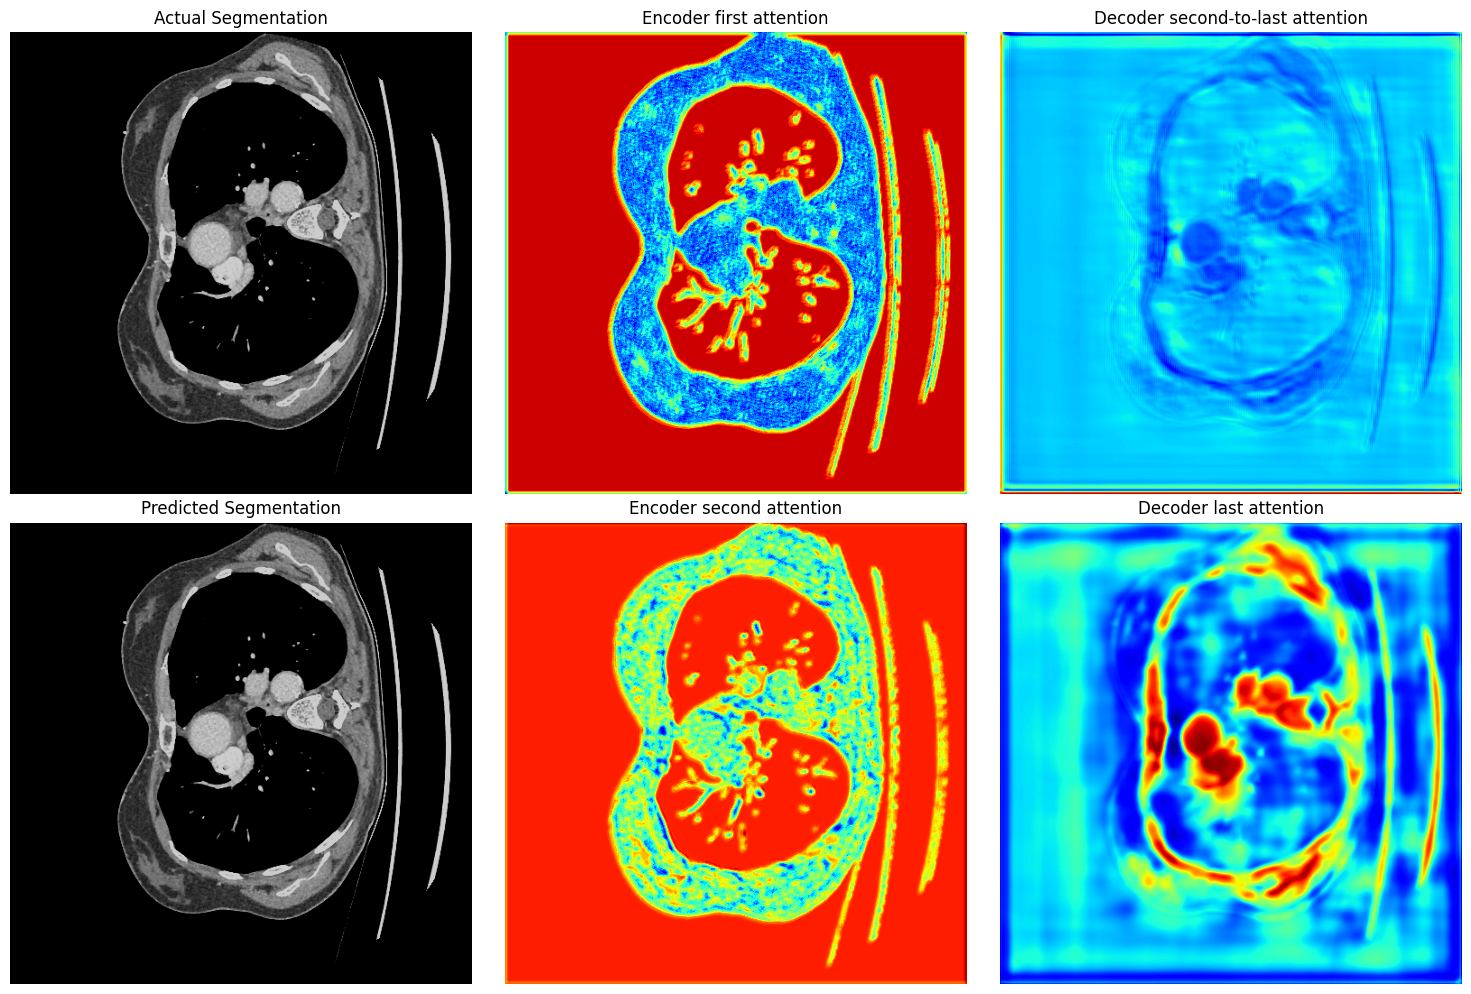

In [ ]:
import matplotlib.pyplot as plt
spatial_attn = features['last_1_spatial']
# img = (vol[2] * torch.sigmoid(spatial_attn[0][0])).unsqueeze(2).numpy() * (512 ** 2)

img_orig = vol[2].unsqueeze(2).numpy()
fig, axes = plt.subplots(2, 3, figsize = (15, 10))


# plot image with real segmentation
real_seg_ax = axes[0][0]
real_seg_ax.imshow(img_orig, cmap='gray')
real_seg_ax.imshow(make_seg_img(seg), cmap='jet', alpha=0.2)
real_seg_ax.set_axis_off()
real_seg_ax.set_title('Actual Segmentation')

# plot image with predicted segmentation
pred_seg_ax = axes[1][0]
pred_seg_ax.imshow(img_orig, cmap='gray')
pred_seg_ax.imshow(make_seg_img(out[0].argmax(0)), cmap='jet', alpha=0.2)
pred_seg_ax.set_axis_off()
pred_seg_ax.set_title('Predicted Segmentation')

# plot first attentnion in encoder
axes[0][1].imshow(features['first_0_spatial'][0][0].unsqueeze(2).numpy(), cmap='jet')
axes[0][1].set_axis_off()
axes[0][1].set_title('Encoder first attention')

# plot second attnetion in encoder
axes[1][1].imshow(features['first_1_spatial'][0][0].unsqueeze(2).numpy(), cmap='jet')
axes[1][1].set_axis_off()
axes[1][1].set_title('Encoder second attention')


axes[0][2].imshow(features['last_0_spatial'][0][0].unsqueeze(2).numpy(), cmap='jet')
axes[0][2].set_axis_off()
axes[0][2].set_title('Decoder second-to-last attention')

# plot second attnetion in encoder
axes[1][2].imshow(features['last_1_spatial'][0][0].unsqueeze(2).numpy(), cmap='jet')
axes[1][2].set_axis_off()
axes[1][2].set_title('Decoder last attention')

fig.tight_layout()



In [ ]:
from datasets.utils import get_split_indices
split = get_split_indices('./datasets/split.json')

In [ ]:
from scipy.ndimage import label
from itertools import chain
from tqdm import tqdm
number_of_tumors = []

for idx in tqdm(chain(split[0], split[1])):
    _, seg = pre.get_scan_no_slice(idx)

    cancer_seg = (seg == 2).int()

    structure = np.ones((3, 3, 3))
    _, n_components = label(cancer_seg, structure)

    number_of_tumors.append(n_components)

110it [08:32,  4.66s/it]


In [ ]:
number_of_tumors

[2,
 2,
 29,
 1,
 2,
 5,
 30,
 8,
 4,
 2,
 2,
 1,
 6,
 2,
 23,
 2,
 1,
 1,
 2,
 2,
 4,
 4,
 1,
 2,
 1,
 1,
 6,
 1,
 11,
 1,
 23,
 1,
 1,
 1,
 1,
 1,
 9,
 7,
 10,
 0,
 1,
 3,
 12,
 6,
 2,
 1,
 10,
 8,
 6,
 0,
 1,
 11,
 1,
 14,
 4,
 6,
 1,
 22,
 10,
 11,
 0,
 0,
 0,
 1,
 0,
 0,
 17,
 3,
 10,
 6,
 1,
 5,
 1,
 10,
 1,
 13,
 7,
 0,
 3,
 6,
 5,
 11,
 1,
 3,
 0,
 2,
 6,
 6,
 5,
 7,
 1,
 28,
 1,
 48,
 9,
 15,
 5,
 5,
 10,
 2,
 1,
 12,
 2,
 0,
 17,
 17,
 0,
 17,
 7,
 5]

In [ ]:
np_tumors = np.array(number_of_tumors)

In [ ]:
np_tumors.mean()

6.136363636363637

<AxesSubplot: ylabel='Count'>

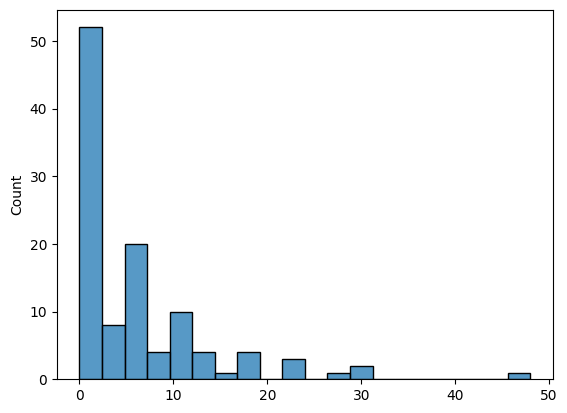

In [ ]:
sns.histplot(np_tumors, bins=20)